## Measurement of objects (grain) sizes from an image using scikit-image library for python.

#### Korobov K.S.

- Step 1: Import and read the image

- Step 2: Threshold (binarize) image to separate objects from boundaries

- Step 3: Clean-up and denoise image

- Step 4: Label objects (grains) in the image

- Step 5: Measure the properties of each object (grains)

- Step 6: Plot results in a histogram

In [1]:
import numpy as np
from skimage import io
import skimage.exposure as exposure
from skimage.color import rgb2gray, label2rgb
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt
plt.style.use(["grid", "notebook", "dark_background"])

#### Step 1

In [2]:
img_one = io.imread('images\grains_one.jpg')
img_two = io.imread('images\grains_two.jpg')
img_three = io.imread('images\grains_three.jpg')

In [3]:
type(img_one)

numpy.ndarray

In [4]:
img_one.shape

(533, 533, 3)

In [5]:
img_one[1][1]

array([224, 214, 204], dtype=uint8)

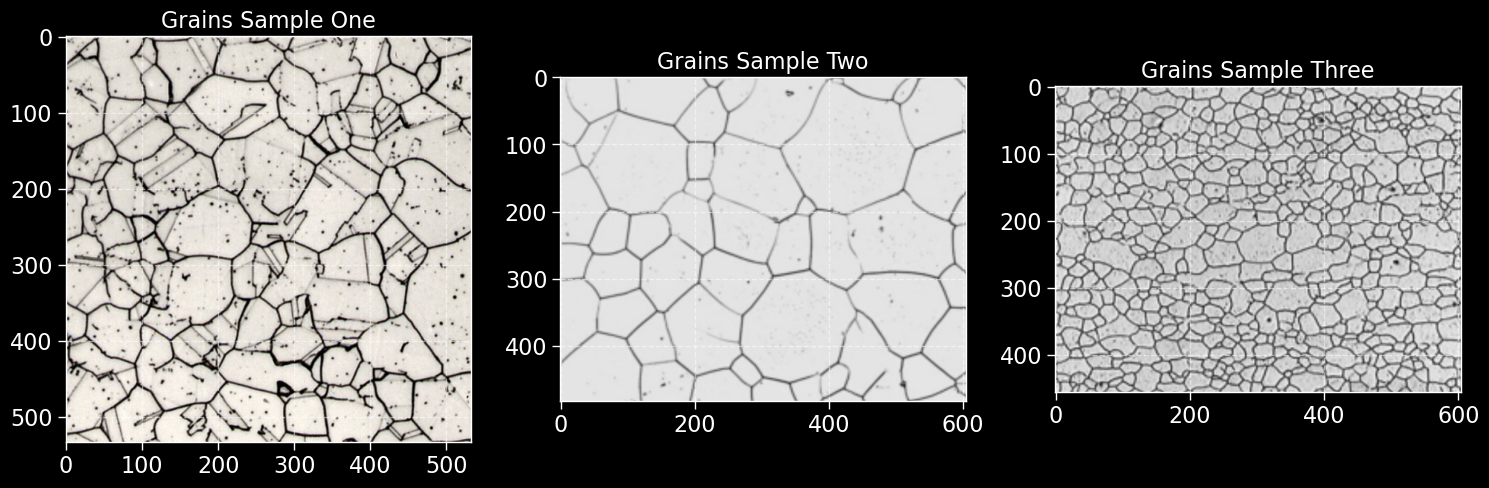

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img_one)
ax[1].imshow(img_two)
ax[2].imshow(img_three)
ax[0].set_title('Grains Sample One')
ax[1].set_title('Grains Sample Two')
ax[2].set_title('Grains Sample Three')
plt.tight_layout()
# plt.show()

In [7]:
# Convert to grayscale
img_one_gray = rgb2gray(img_one)
img_two_gray = rgb2gray(img_two)
img_three_gray = rgb2gray(img_three)

In [8]:
print(img_one_gray.shape)
print(img_two_gray.shape)
print(img_three_gray.shape)

(533, 533)
(483, 605)
(455, 604)


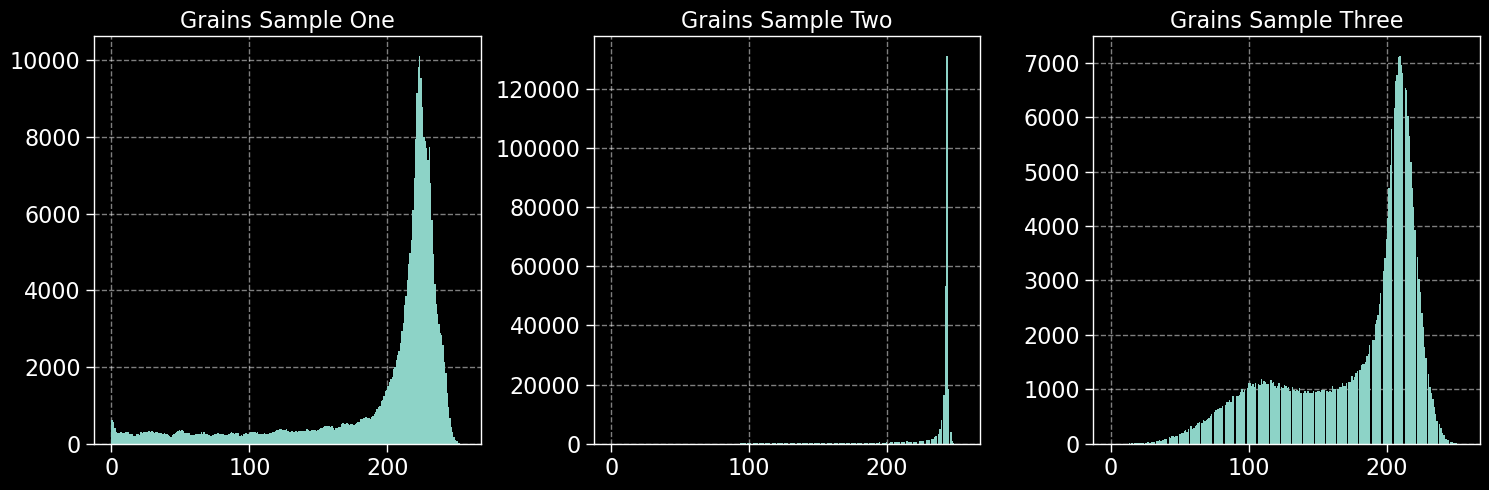

In [9]:
# Rescale intensity values using skimage.exposure.rescale_intensity

img_one_rescaled = exposure.rescale_intensity(img_one_gray, out_range=np.uint8)
img_two_rescaled = exposure.rescale_intensity(img_two_gray, out_range=np.uint8)
img_three_rescaled = exposure.rescale_intensity(img_three_gray, out_range=np.uint8)

# Plot histograms of the rescaled images

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist(img_one_rescaled.ravel(), bins=256)
ax[1].hist(img_two_rescaled.ravel(), bins=256)
ax[2].hist(img_three_rescaled.ravel(), bins=256)
ax[0].set_title('Grains Sample One')
ax[1].set_title('Grains Sample Two')
ax[2].set_title('Grains Sample Three')
plt.tight_layout()

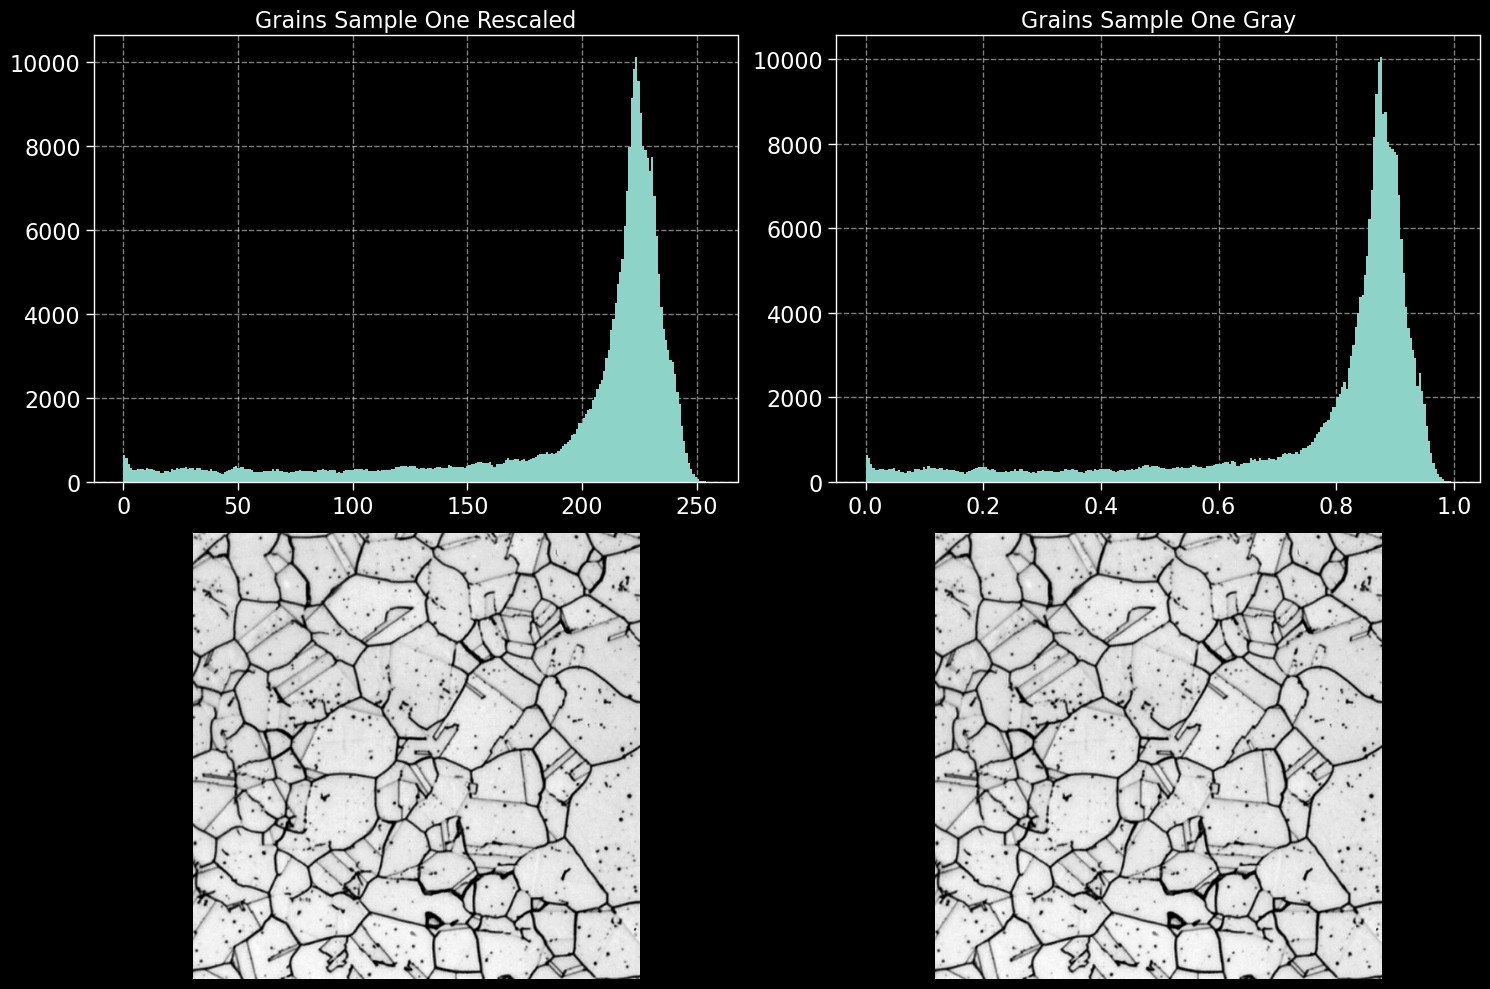

In [10]:
# Plot two histograms of the img_one and img_one_gray on two different axes
# Create 4 subplots and on the second row put corresponding images
# On the first row put the histograms of the images. Turn off the axis on the second row

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].hist(img_one_rescaled.ravel(), bins=256)
ax[0, 1].hist(img_one_gray.ravel(), bins=256)
ax[1, 0].imshow(img_one_rescaled, cmap='gray')
ax[1, 1].imshow(img_one_gray, cmap='gray')
ax[0, 0].set_title('Grains Sample One Rescaled')
ax[0, 1].set_title('Grains Sample One Gray')
# ax[1, 0].set_title('Grains Sample One Rescaled')
# ax[1, 1].set_title('Grains Sample One Gray')
ax[1, 0].axis('off')
ax[1, 1].axis('off')
plt.tight_layout()

In [11]:
img_one_gray[1][1]*255

215.404

In [12]:
img_one_rescaled[1][1]

216

In [13]:
print(f"img_one_rescaled.dtype = {img_one_rescaled.dtype}")
print(f"img_one_gray.dtype = {img_one_gray.dtype}")

img_one_rescaled.dtype = uint8
img_one_gray.dtype = float64


In the plot above, you’ll notice that on the left-hand side image the x-axis has been rescaled to restore the **integer values**.

#### Step 2

The next step is to use thresholding to create binary images from grayscale ones.

In [14]:
from skimage.filters import try_all_threshold, threshold_mean, threshold_otsu,\
    threshold_triangle, threshold_minimum, threshold_yen, threshold_isodata

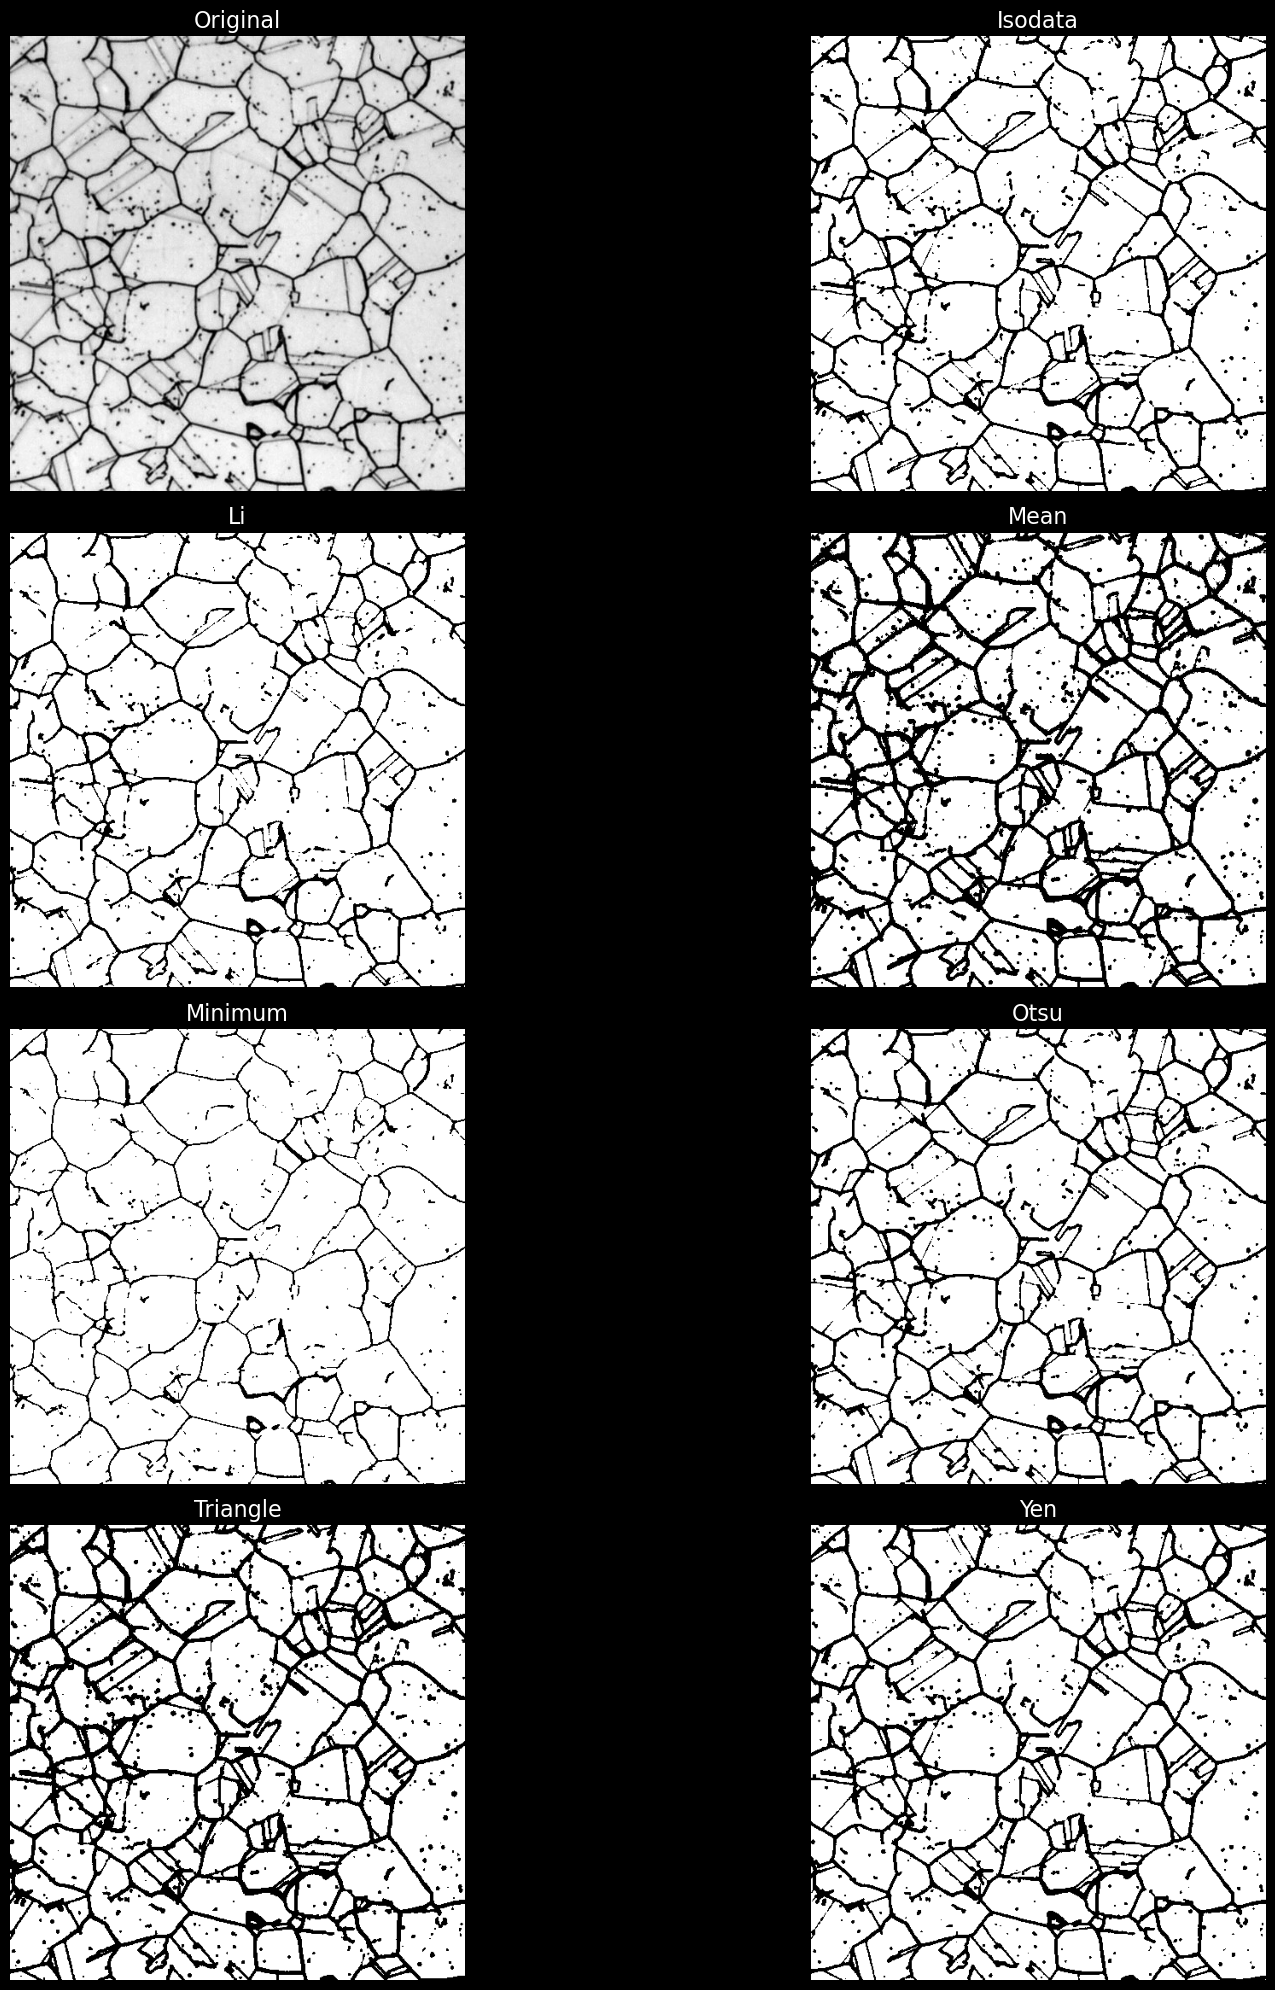

In [15]:
# Try all the thresholding methods on the img_one_rescaled
# Use the try_all_threshold function from skimage.filters

fig, ax = try_all_threshold(img_one_rescaled, figsize=(30, 20), verbose=False)
plt.tight_layout()

In [16]:
# Use all threshold methods on the img_one_rescaled

threshold_mean = threshold_mean(img_one_rescaled)
threshold_otsu = threshold_otsu(img_one_rescaled)
threshold_triangle = threshold_triangle(img_one_rescaled)
threshold_minimum = threshold_minimum(img_one_rescaled)
threshold_yen = threshold_yen(img_one_rescaled)
threshold_isodata = threshold_isodata(img_one_rescaled)

# Create a binary image using threshold_mean, threshold_otsu, threshold_triangle, threshold_minimum, threshold_yen, threshold_isodata

binary_mean = img_one_rescaled > threshold_mean
binary_otsu = img_one_rescaled > threshold_otsu
binary_triangle = img_one_rescaled > threshold_triangle
binary_minimum = img_one_rescaled > threshold_minimum
binary_yen = img_one_rescaled > threshold_yen
binary_iso = img_one_rescaled > threshold_isodata

# Label the binary images and count the number of grains in each image

label_mean = label(binary_mean)
label_otsu = label(binary_otsu)
label_triangle = label(binary_triangle)
label_minimum = label(binary_minimum)
label_yen = label(binary_yen)
label_iso = label(binary_iso)

In [17]:
type(label_mean)

numpy.ndarray

In [18]:
label_mean.dtype

dtype('int32')

In [19]:
label_mean.shape

(533, 533)

In [20]:
label_mean.max()

243

In [21]:
label_minimum.max()

38

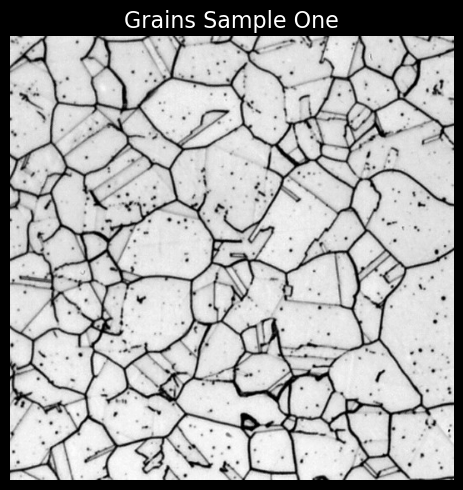

In [22]:
# Plot original image.

plt.figure(figsize=(5,5))
plt.imshow(img_one_rescaled, cmap='gray')
plt.title('Grains Sample One')
plt.axis('off')
plt.tight_layout()

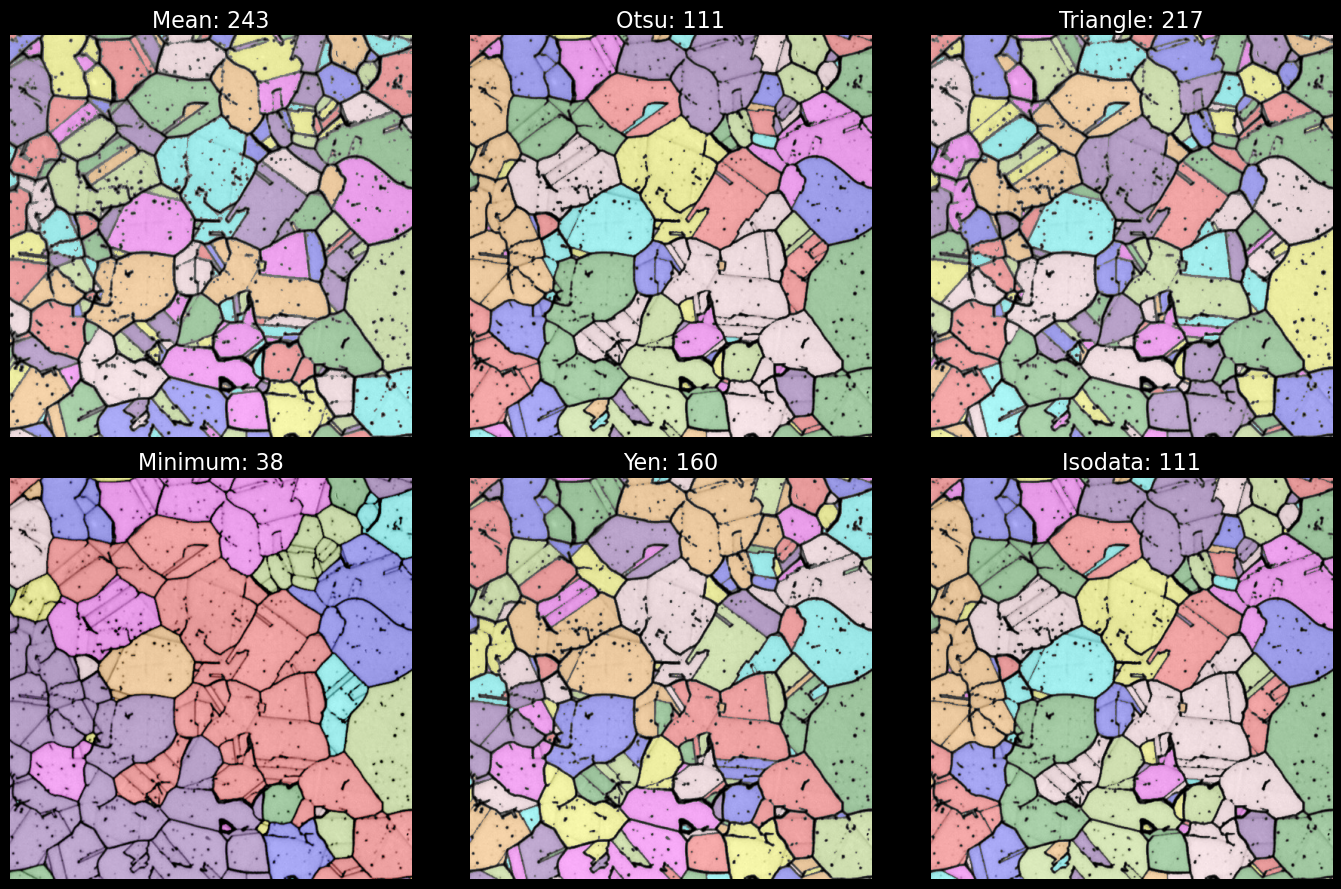

In [23]:
# Plot the labeled images and put number of grains in the title. Disable the axis.

fig, ax = plt.subplots(2, 3, figsize=(14, 9))
ax[0, 0].imshow(label2rgb(label_mean, image=img_one_rescaled, bg_label=0))
ax[0, 1].imshow(label2rgb(label_otsu, image=img_one_rescaled, bg_label=0))
ax[0, 2].imshow(label2rgb(label_triangle, image=img_one_rescaled, bg_label=0))
ax[1, 0].imshow(label2rgb(label_minimum, image=img_one_rescaled, bg_label=0))
ax[1, 1].imshow(label2rgb(label_yen, image=img_one_rescaled, bg_label=0))
ax[1, 2].imshow(label2rgb(label_iso, image=img_one_rescaled, bg_label=0))
ax[0, 0].set_title(f"Mean: {np.max(label_mean)}")
ax[0, 1].set_title(f"Otsu: {np.max(label_otsu)}")
ax[0, 2].set_title(f"Triangle: {np.max(label_triangle)}")
ax[1, 0].set_title(f"Minimum: {np.max(label_minimum)}")
ax[1, 1].set_title(f"Yen: {np.max(label_yen)}")
ax[1, 2].set_title(f"Isodata: {np.max(label_iso)}")
ax[0, 0].axis('off')
ax[0, 1].axis('off')
ax[0, 2].axis('off')
ax[1, 0].axis('off')
ax[1, 1].axis('off')
ax[1, 2].axis('off')
plt.tight_layout()

In [24]:
# Use regionprops to get the area of each grain in the image

props_mean = regionprops(label_mean)
props_otsu = regionprops(label_otsu)
props_triangle = regionprops(label_triangle)
props_minimum = regionprops(label_minimum)
props_yen = regionprops(label_yen)
props_iso = regionprops(label_iso)

# Create a list of areas for each image

areas_mean = [prop.area for prop in props_mean]
areas_otsu = [prop.area for prop in props_otsu]
areas_triangle = [prop.area for prop in props_triangle]
areas_minimum = [prop.area for prop in props_minimum]
areas_yen = [prop.area for prop in props_yen]
areas_iso = [prop.area for prop in props_iso]

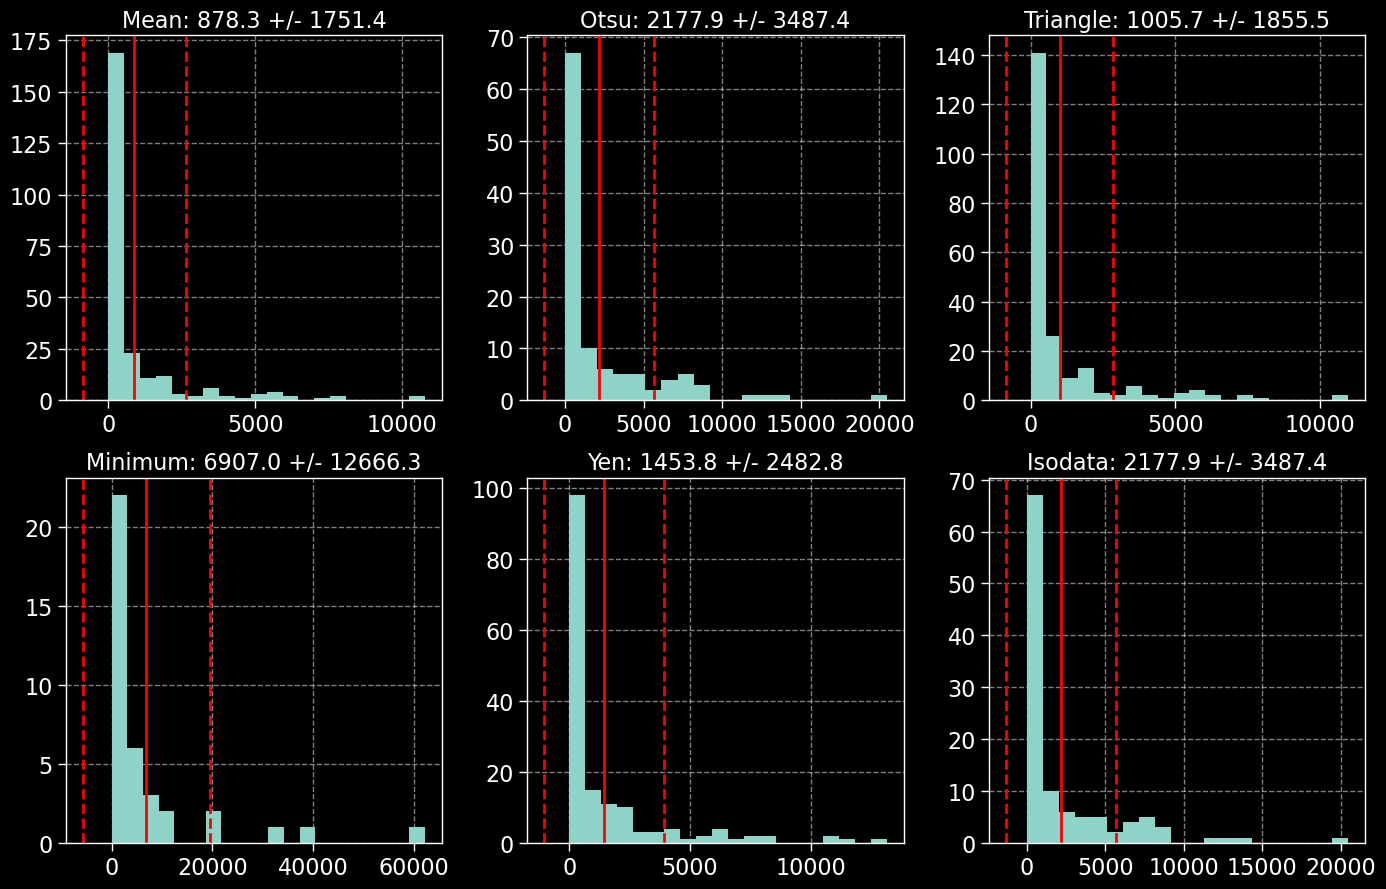

In [25]:
# Plot the histogram of the areas for each image and put the mean and standard deviation in the title.
# Create a vertical line at the mean and standard deviation, use different colors for each line.

fig, ax = plt.subplots(2, 3, figsize=(14, 9))
ax[0, 0].hist(areas_mean, bins=20)
ax[0, 0].axvline(np.mean(areas_mean), color='r')
ax[0, 0].axvline(np.mean(areas_mean) + np.std(areas_mean), color='r', linestyle='--')
ax[0, 0].axvline(np.mean(areas_mean) - np.std(areas_mean), color='r', linestyle='--')

ax[0, 1].hist(areas_otsu, bins=20)
ax[0, 1].axvline(np.mean(areas_otsu), color='r')
ax[0, 1].axvline(np.mean(areas_otsu) + np.std(areas_otsu), color='r', linestyle='--')
ax[0, 1].axvline(np.mean(areas_otsu) - np.std(areas_otsu), color='r', linestyle='--')

ax[0, 2].hist(areas_triangle, bins=20)
ax[0, 2].axvline(np.mean(areas_triangle), color='r')
ax[0, 2].axvline(np.mean(areas_triangle) + np.std(areas_triangle), color='r', linestyle='--')
ax[0, 2].axvline(np.mean(areas_triangle) - np.std(areas_triangle), color='r', linestyle='--')

ax[1, 0].hist(areas_minimum, bins=20)
ax[1, 0].axvline(np.mean(areas_minimum), color='r')
ax[1, 0].axvline(np.mean(areas_minimum) + np.std(areas_minimum), color='r', linestyle='--')
ax[1, 0].axvline(np.mean(areas_minimum) - np.std(areas_minimum), color='r', linestyle='--')

ax[1, 1].hist(areas_yen, bins=20)
ax[1, 1].axvline(np.mean(areas_yen), color='r')
ax[1, 1].axvline(np.mean(areas_yen) + np.std(areas_yen), color='r', linestyle='--')
ax[1, 1].axvline(np.mean(areas_yen) - np.std(areas_yen), color='r', linestyle='--')

ax[1, 2].hist(areas_iso, bins=20)
ax[1, 2].axvline(np.mean(areas_iso), color='r')
ax[1, 2].axvline(np.mean(areas_iso) + np.std(areas_iso), color='r', linestyle='--')
ax[1, 2].axvline(np.mean(areas_iso) - np.std(areas_iso), color='r', linestyle='--')

ax[0, 0].set_title(f"Mean: {np.mean(areas_mean):.1f} +/- {np.std(areas_mean):.1f}")
ax[0, 1].set_title(f"Otsu: {np.mean(areas_otsu):.1f} +/- {np.std(areas_otsu):.1f}")
ax[0, 2].set_title(f"Triangle: {np.mean(areas_triangle):.1f} +/- {np.std(areas_triangle):.1f}")
ax[1, 0].set_title(f"Minimum: {np.mean(areas_minimum):.1f} +/- {np.std(areas_minimum):.1f}")
ax[1, 1].set_title(f"Yen: {np.mean(areas_yen):.1f} +/- {np.std(areas_yen):.1f}")
ax[1, 2].set_title(f"Isodata: {np.mean(areas_iso):.1f} +/- {np.std(areas_iso):.1f}")

plt.tight_layout()

In [26]:
# Creat a list of ellipses for each image
# Use the ellipse to get the major and minor axis length for each grain
# Calculate the aspect ratio for each grain
# Ellipticity is the ratio of the major axis length to the minor axis length.
# In case of the zero division error, set the ellipticity to 1.

ellipses_mean = [prop.major_axis_length / prop.minor_axis_length for prop in props_mean if prop.minor_axis_length != 0]
ellipses_otsu = [prop.major_axis_length / prop.minor_axis_length for prop in props_otsu if prop.minor_axis_length != 0]
ellipses_triangle = [prop.major_axis_length / prop.minor_axis_length for prop in props_triangle if prop.minor_axis_length != 0]
ellipses_minimum = [prop.major_axis_length / prop.minor_axis_length for prop in props_minimum if prop.minor_axis_length != 0]
ellipses_yen = [prop.major_axis_length / prop.minor_axis_length for prop in props_yen if prop.minor_axis_length != 0]
ellipses_iso = [prop.major_axis_length / prop.minor_axis_length for prop in props_iso if prop.minor_axis_length != 0]

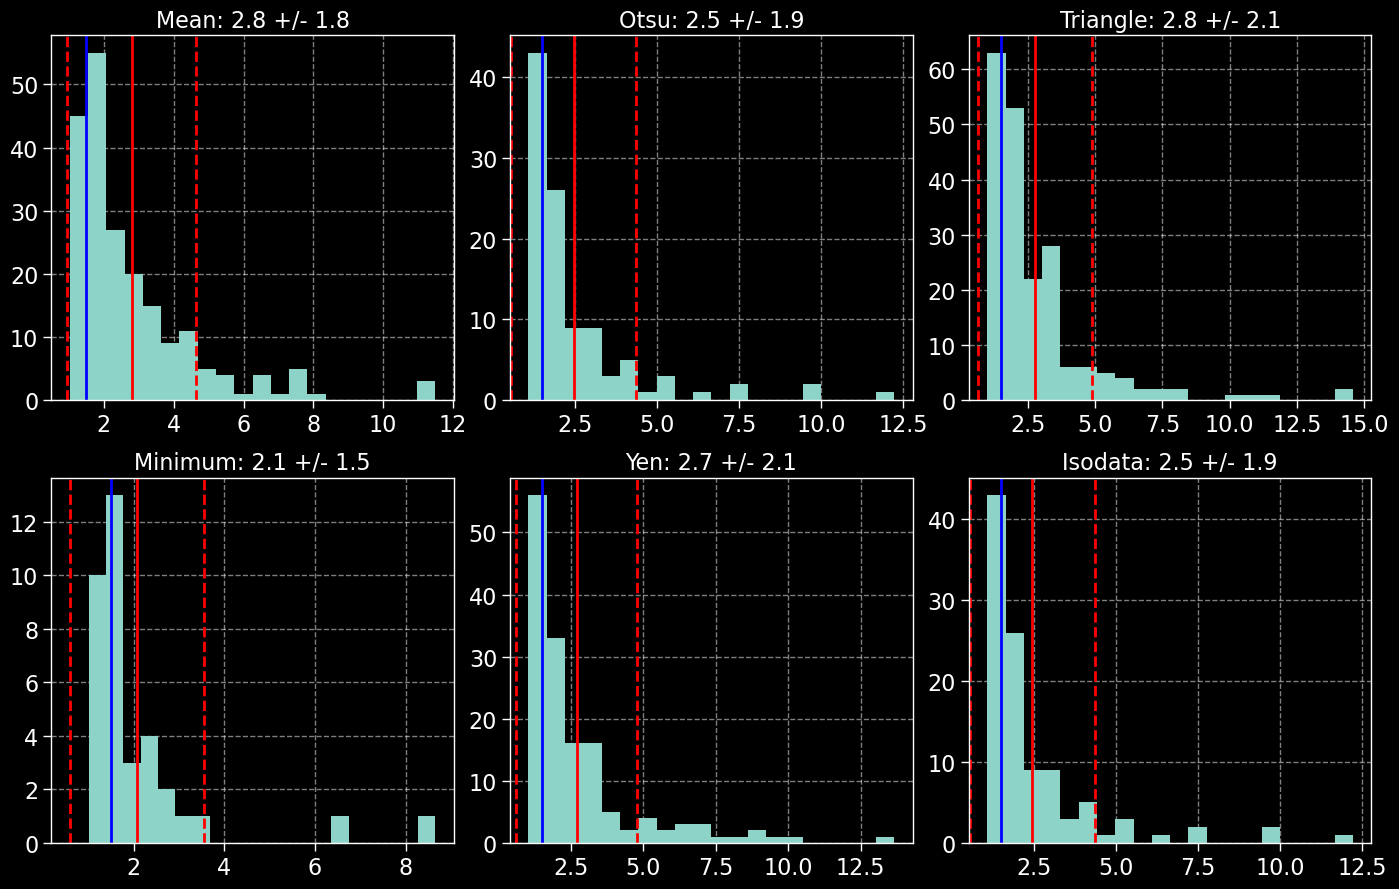

In [27]:
# Plot the histogram of the ellipticities for each image and put the mean and standard deviation in the title.
# Create a vertical line at the mean and standard deviation, use different colors for each line.

fig, ax = plt.subplots(2, 3, figsize=(14, 9))
ax[0, 0].hist(ellipses_mean, bins=20)
ax[0, 0].axvline(np.mean(ellipses_mean), color='r')
ax[0, 0].axvline(1.5, color='b')
ax[0, 0].axvline(np.mean(ellipses_mean) + np.std(ellipses_mean), color='r', linestyle='--')
ax[0, 0].axvline(np.mean(ellipses_mean) - np.std(ellipses_mean), color='r', linestyle='--')

ax[0, 1].hist(ellipses_otsu, bins=20)
ax[0, 1].axvline(np.mean(ellipses_otsu), color='r')
ax[0, 1].axvline(1.5, color='b')
ax[0, 1].axvline(np.mean(ellipses_otsu) + np.std(ellipses_otsu), color='r', linestyle='--')
ax[0, 1].axvline(np.mean(ellipses_otsu) - np.std(ellipses_otsu), color='r', linestyle='--')

ax[0, 2].hist(ellipses_triangle, bins=20)
ax[0, 2].axvline(np.mean(ellipses_triangle), color='r')
ax[0, 2].axvline(1.5, color='b')
ax[0, 2].axvline(np.mean(ellipses_triangle) + np.std(ellipses_triangle), color='r', linestyle='--')
ax[0, 2].axvline(np.mean(ellipses_triangle) - np.std(ellipses_triangle), color='r', linestyle='--')

ax[1, 0].hist(ellipses_minimum, bins=20)
ax[1, 0].axvline(np.mean(ellipses_minimum), color='r')
ax[1, 0].axvline(1.5, color='b')
ax[1, 0].axvline(np.mean(ellipses_minimum) + np.std(ellipses_minimum), color='r', linestyle='--')
ax[1, 0].axvline(np.mean(ellipses_minimum) - np.std(ellipses_minimum), color='r', linestyle='--')

ax[1, 1].hist(ellipses_yen, bins=20)
ax[1, 1].axvline(np.mean(ellipses_yen), color='r')
ax[1, 1].axvline(1.5, color='b')
ax[1, 1].axvline(np.mean(ellipses_yen) + np.std(ellipses_yen), color='r', linestyle='--')
ax[1, 1].axvline(np.mean(ellipses_yen) - np.std(ellipses_yen), color='r', linestyle='--')

ax[1, 2].hist(ellipses_iso, bins=20)
ax[1, 2].axvline(np.mean(ellipses_iso), color='r')
ax[1, 2].axvline(1.5, color='b')
ax[1, 2].axvline(np.mean(ellipses_iso) + np.std(ellipses_iso), color='r', linestyle='--')
ax[1, 2].axvline(np.mean(ellipses_iso) - np.std(ellipses_iso), color='r', linestyle='--')

ax[0, 0].set_title(f"Mean: {np.mean(ellipses_mean):.1f} +/- {np.std(ellipses_mean):.1f}")
ax[0, 1].set_title(f"Otsu: {np.mean(ellipses_otsu):.1f} +/- {np.std(ellipses_otsu):.1f}")
ax[0, 2].set_title(f"Triangle: {np.mean(ellipses_triangle):.1f} +/- {np.std(ellipses_triangle):.1f}")
ax[1, 0].set_title(f"Minimum: {np.mean(ellipses_minimum):.1f} +/- {np.std(ellipses_minimum):.1f}")
ax[1, 1].set_title(f"Yen: {np.mean(ellipses_yen):.1f} +/- {np.std(ellipses_yen):.1f}")
ax[1, 2].set_title(f"Isodata: {np.mean(ellipses_iso):.1f} +/- {np.std(ellipses_iso):.1f}")

plt.tight_layout()

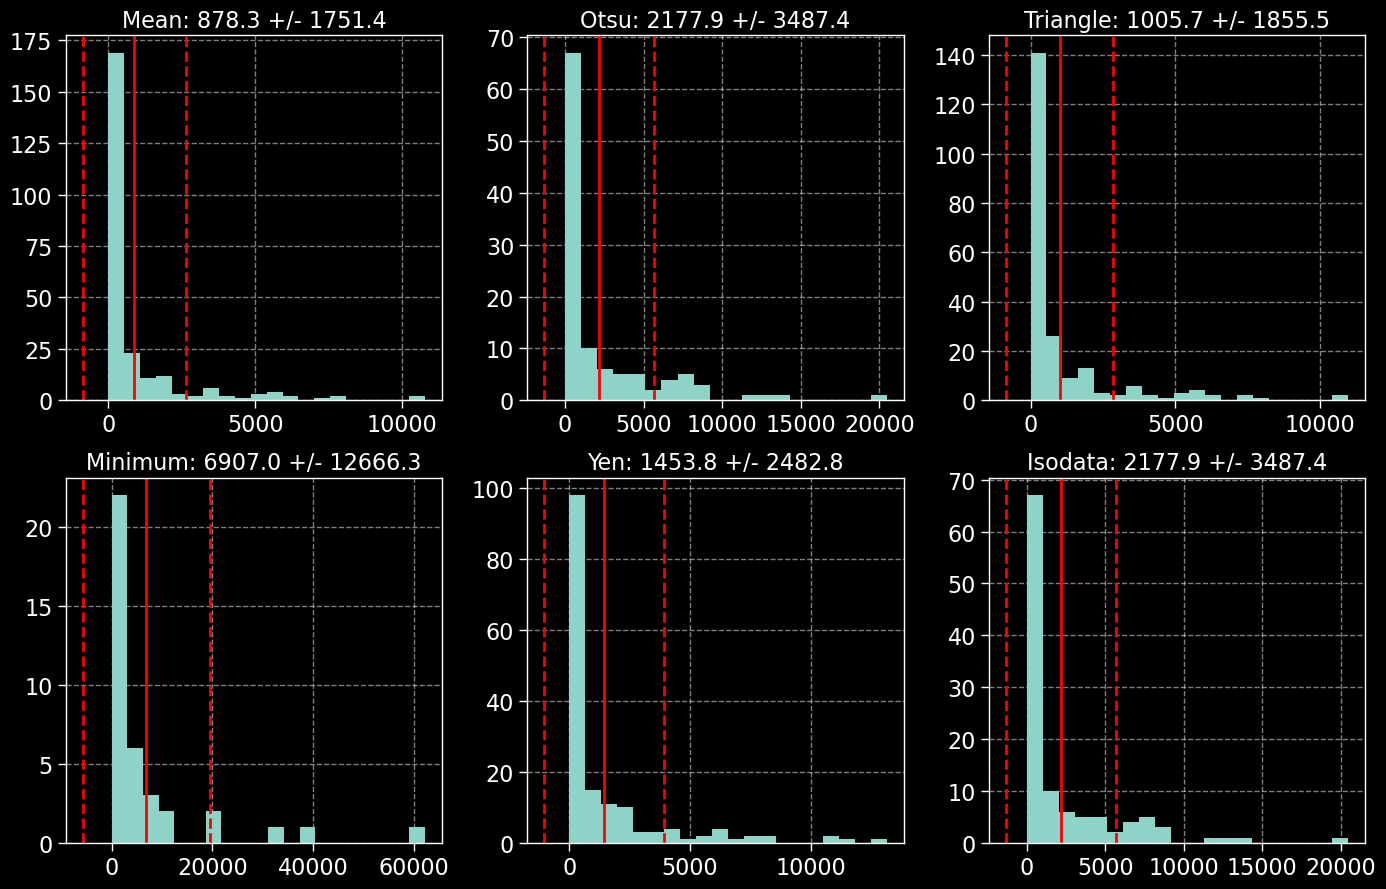

In [28]:
# Create a list of the mean and standard deviation of the area of the ellipses for each image.
# put the mean and standard deviation in the title.

areas_mean = [prop.area for prop in props_mean]
areas_otsu = [prop.area for prop in props_otsu]
areas_triangle = [prop.area for prop in props_triangle]
areas_minimum = [prop.area for prop in props_minimum]
areas_yen = [prop.area for prop in props_yen]
areas_iso = [prop.area for prop in props_iso]

fig, ax = plt.subplots(2, 3, figsize=(14, 9))
ax[0, 0].hist(areas_mean, bins=20)
ax[0, 0].axvline(np.mean(areas_mean), color='r')
ax[0, 0].axvline(np.mean(areas_mean) + np.std(areas_mean), color='r', linestyle='--')
ax[0, 0].axvline(np.mean(areas_mean) - np.std(areas_mean), color='r', linestyle='--')

ax[0, 1].hist(areas_otsu, bins=20)
ax[0, 1].axvline(np.mean(areas_otsu), color='r')
ax[0, 1].axvline(np.mean(areas_otsu) + np.std(areas_otsu), color='r', linestyle='--')
ax[0, 1].axvline(np.mean(areas_otsu) - np.std(areas_otsu), color='r', linestyle='--')

ax[0, 2].hist(areas_triangle, bins=20)
ax[0, 2].axvline(np.mean(areas_triangle), color='r')
ax[0, 2].axvline(np.mean(areas_triangle) + np.std(areas_triangle), color='r', linestyle='--')
ax[0, 2].axvline(np.mean(areas_triangle) - np.std(areas_triangle), color='r', linestyle='--')

ax[1, 0].hist(areas_minimum, bins=20)
ax[1, 0].axvline(np.mean(areas_minimum), color='r')
ax[1, 0].axvline(np.mean(areas_minimum) + np.std(areas_minimum), color='r', linestyle='--')
ax[1, 0].axvline(np.mean(areas_minimum) - np.std(areas_minimum), color='r', linestyle='--')

ax[1, 1].hist(areas_yen, bins=20)
ax[1, 1].axvline(np.mean(areas_yen), color='r')
ax[1, 1].axvline(np.mean(areas_yen) + np.std(areas_yen), color='r', linestyle='--')
ax[1, 1].axvline(np.mean(areas_yen) - np.std(areas_yen), color='r', linestyle='--')

ax[1, 2].hist(areas_iso, bins=20)
ax[1, 2].axvline(np.mean(areas_iso), color='r')
ax[1, 2].axvline(np.mean(areas_iso) + np.std(areas_iso), color='r', linestyle='--')
ax[1, 2].axvline(np.mean(areas_iso) - np.std(areas_iso), color='r', linestyle='--')

ax[0, 0].set_title(f"Mean: {np.mean(areas_mean):.1f} +/- {np.std(areas_mean):.1f}")
ax[0, 1].set_title(f"Otsu: {np.mean(areas_otsu):.1f} +/- {np.std(areas_otsu):.1f}")
ax[0, 2].set_title(f"Triangle: {np.mean(areas_triangle):.1f} +/- {np.std(areas_triangle):.1f}")
ax[1, 0].set_title(f"Minimum: {np.mean(areas_minimum):.1f} +/- {np.std(areas_minimum):.1f}")
ax[1, 1].set_title(f"Yen: {np.mean(areas_yen):.1f} +/- {np.std(areas_yen):.1f}")
ax[1, 2].set_title(f"Isodata: {np.mean(areas_iso):.1f} +/- {np.std(areas_iso):.1f}")

plt.tight_layout()